In [1]:
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
x1, y1 = samples_generator.make_classification(n_samples = 150, n_features = 25,
                                            n_classes =3, n_informative = 6,
                                            n_redundant = 0, random_state = 7)
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target

In [4]:
# selecting top k features

k_best_selector = SelectKBest(f_regression, k = 3)

classifier = ExtraTreesClassifier(n_estimators= 60, max_depth = 4)

In [5]:
# construct the pipeline
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])

In [6]:
# set the parameters
processor_pipeline.set_params(selector__k = 3, erf__n_estimators = 30)

# traiing the pipeline
processor_pipeline.fit(x,y)

# predict outputs for the input data
output = processor_pipeline.predict(x)
print ("\nPredicted output:\n", output)

# print scores
print ("\nScore: ", processor_pipeline.score(x,y))


Predicted output:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Score:  0.973333333333


In [7]:
# print the features chosen by the pipeline selector
status = processor_pipeline.named_steps['selector'].get_support()

# extract and print indices of selected features
selected = [i for i , x in enumerate(status) if x]
print ("\n Indices of selected features: ", ', '.join([str(x) for x in selected]))


 Indices of selected features:  0, 2, 3


In [8]:
# Extracting the nearest neighbors

from sklearn.neighbors import NearestNeighbors

j = np.array([[2.1,1.3],[1.3,3.2],[2.9,2.5],[2.7,5.4],[3.8,0.9],[7.3,2.1],[4.2,6.5],
             [3.8,3.7],[2.5,4.1],[3.4,1.9],[5.7,3.5],[6.1,4.3],[5.1,2.2],[6.2,1.1]])

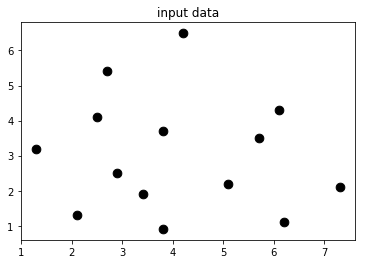


K Nearest Neighbors: 
1 ==> [ 5.1  2.2]
2 ==> [ 3.8  3.7]
3 ==> [ 3.4  1.9]
4 ==> [ 2.9  2.5]
5 ==> [ 5.7  3.5]


In [9]:
# define the number of nearest neighbor you want to extract
# number of nearest neighbors k = 5

test_datapoint = [4.3,2.7]
k = 5

plt.figure()
plt.title("input data")
plt.scatter(j[:,0], j[:,1], marker = 'o', s = 75, color = 'black')
plt.show()

# building K nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(j)
distances, indices = knn_model.kneighbors(test_datapoint)

print ("\nK Nearest Neighbors: ")
for rank, index in enumerate(indices[0][:k], start = 1):
    print (str(rank) + " ==>", j[index])

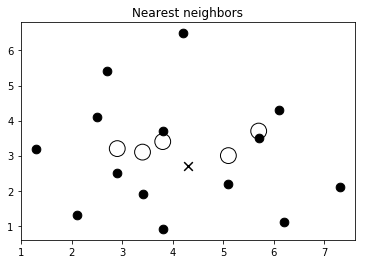

In [10]:
# print the nearest neighbors
# visualize the nearest neighbors along with the test datapoint
plt.figure()
plt.title("Nearest neighbors")
plt.scatter(j[:,0], j[:,1], marker = 'o', s = 75, color = 'k')
plt.scatter(j[indices][0][:][:,0], x[indices][0][:][:,1], marker = 'o', s = 250,
             color = 'k', facecolor = 'none')
plt.scatter(test_datapoint[0], test_datapoint[1], marker = 'x', s = 75, color = 'k')
plt.show()

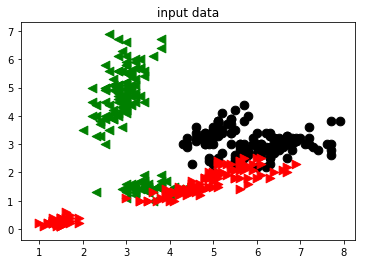


K Nearest Neighbors: 
1 ==> [ 4.5  2.3  1.3  0.3]
2 ==> [ 4.4  2.9  1.4  0.2]
3 ==> [ 4.3  3.   1.1  0.1]
4 ==> [ 4.4  3.   1.3  0.2]
5 ==> [ 4.4  3.2  1.3  0.2]


In [11]:
# define the number of nearest neighbor you want to extract
# number of nearest neighbors k = 5

test_datapoint = [4.3,2.7]
k = 5

plt.figure()
plt.title("input data")
plt.scatter(x[:,0], x[:,1], marker = 'o', s = 75, color = 'black')
plt.scatter(x[:,1], x[:,2], marker = '<', s = 75, color = 'green')
plt.scatter(x[:,2], x[:,3], marker = '>', s = 75, color = 'red')


plt.show()
data_point = [1.1, 1.2,1.5, 1.6]

# building K nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(x)
distances, indices = knn_model.kneighbors(data_point)

print ("\nK Nearest Neighbors: ")
for rank, index in enumerate(indices[0][:k], start = 1):
    print (str(rank) + " ==>", x[index])

In [12]:
import matplotlib.cm as cm
from sklearn import neighbors, datasets

n_neighbors = 12
step_size = 0.01

# create k nearest Neighbors classifier model
classifier = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
classifier.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='distance')

In [13]:
# create the mesh grid of values that will be used to visualize the grid

x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# evaluate the classifier on all the points on the grid
value = [x_values.ravel(), y_values.ravel()]
print (value)
#np.c_[value]
#output = classifier.predict(np.c_[value])


[array([ 3.3 ,  3.31,  3.32, ...,  8.87,  8.88,  8.89]), array([ 1.  ,  1.  ,  1.  , ...,  5.39,  5.39,  5.39])]


In [ ]:
# choosing a color mesh to visualize the output

output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap = cm.Paired)
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model bouncaries')

# define a test datapoint to see how the classifier performs
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title("Test datapoint")
for i in range(x.shape[0]):
    plt.scatter(x[i, 0], x[i,1], marker = mapper[i], s = 75, edgecolors = 'black', 
               facecolors = 'black')
    
# extract the k nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]
 
plt.figure()
plt.title("K nearest Neighbors")
.....

In [ ]:
# computing similarity scores

import argparse
import json
import numpy as np
# build an argument parser to process the input arguments. It will accept two users and they
# type of score that it needs to use to compute the similarity score.

def build_arg_parser():
    parser = argparse.ArgumentParser(description = 'compute similarity score')
    parser.add_argument("--user1", dest = 'user1', required = True, help = 'First user')
    parser.add_argument("--user2", dest = 'user2', required = True, help = 'Second user')
    parser.add_argument("--score-type", )

In [ ]:
# Define the function to compute the Euclidean score between the input users,
# if the users are not in the dataset, raise an error.


def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError("cannot find " + user1 + " in the dataset")
    
    if user2 not in dataset:
        raise TypeError("cannot find " + user2 + " in the dataset")
        
# define a variable to track the movies that have been rated by both the users.
common_movies = {}

# extract movies rated by both users
for item in dataset[user1]:
    if item in dataset[user2]:
        common_movies[item] = 1
        
        
if len(common_movies) == 0:
    return 0

# compute the sqauared difference between the ratings and use it to compute the 
# Euclidean score
squared_diff = []
for item in dataset[user1]:
    if item in dataset[user2]:
        squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))
        return 1 / (1+ np.sqrt(np.sum(squared_diff)))
    

    
# definde a function to compute the Pearson score between the input users in the given
# dataset. if the user is not found in the dataset, raise an error

if user1 not in dataset:
    raise TypeError("cannot find " + user1 + " in the dataset")
if user2 not in dataset:
    raise TypeError("Cannot find " + user2 + " in the dataset")
    
# movies rated by both user1 and user2
common_movies = {}

for item in dataset[user1]:
    if item in dataset[user2]:
        common_movies[item] = 1
        
num_ratings = len(common_movies)
if num_ratings == 0:
    return 0

# calculate the sum of ratings of all the movies that have been rated by both users
user1_sum = np.sum([dataset[user1][item] for item in common_movies])
user2_sum = np.sum([dataset[user2][item] for item in common_movies])

# calculate the sum of squres of ratings of all the common movies
user1_squared_sum = np.sum([np.square([dataset[user1][item] for item in common_movies])])
user2_squared_sum = np.sum([np.square([dataset[user2][item] for item in common_movies])])


# calculate the sum of products of the ratings of the common movies 
sum_of_product = np.sum([dataset[user1][item] * dataset[user2][item] for item in common_movies])

# calculate the various parameter used to compute the Pearson score
sxy = sum_of_products - (user1_sum * user2_sum / num_ratings)
sxx = user1_squared_num - np.square(user1_sum) /  num_ratings
syy = user_2_squred_sum - np.square(user2_sum) / num_ratings

if sxx * syy == 0:
    return 0 

# return the pearson score
return sxy / np.sqrt(sxx * syy)

if __name__ == '__main__':
    args = build_arg_parser().parse_args()
    user1 = args.user1
    user2 = args.user2
    score_type = args.score_type
    
# load the ratings for the file ratings.json 
ratings_file = 'ratings.json'
with open(ratings_file, 'r') as f:
    data = json.loads(f.read())
    
# compute the similarity score based on the input arguments
if score_type == 'Euclidean':
    print ("\nEuclidean score: ")
    print (euclidean_score(data, user1, user2))
    
else:
    print ("\nPearson score: ")
    print (pearson_score(data, user1, user2))
    
    

In [2]:
# finding similar users using collaborative filtering

